# PCR Model

In [1]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [4]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [5]:
y = df["Salary"]

In [6]:
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64","int64")

In [7]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [8]:
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


In [9]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

training = df.copy()
print("training ")

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training 


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
pca = PCA()

In [11]:
X_reduce_train = pca.fit_transform(scale(X_train))

In [12]:
X_reduce_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [13]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [14]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [15]:
lm = LinearRegression()

In [16]:
pcr_model = lm.fit(X_reduce_train,y_train)

In [17]:
pcr_model.intercept_

543.4834416243655

In [18]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

# Tahmin

In [19]:
y_pred = pcr_model.predict(X_reduce_train)

In [20]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [21]:
from sklearn.metrics import mean_squared_error , r2_score
np.sqrt(mean_squared_error(y_train,y_pred))

289.3292825564976

In [22]:
df["Salary"].mean()

535.9258821292775

In [23]:
r2_score(y_train,y_pred)

0.5770075250410179

In [24]:
pca2 = PCA()

In [25]:
X_reduce_test = pca2.fit_transform(scale(X_test))

In [26]:
y_pred = pcr_model.predict(X_reduce_test)

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.1575364149966

# Model Tuning

In [28]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduce_train[:,0:1],y_train)
y_pred = pcr_model.predict(X_reduce_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

392.3893558949346


In [29]:
pcr_model = lm.fit(X_reduce_train[:,0:2],y_train)
y_pred = pcr_model.predict(X_reduce_test[:,0:2])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

396.38761247967653


In [30]:
pcr_model = lm.fit(X_reduce_train[:,0:10],y_train)
y_pred = pcr_model.predict(X_reduce_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

390.79142556822234


In [31]:
from sklearn import model_selection

In [32]:
cv_10 = model_selection.KFold(n_splits = 10,shuffle = True,random_state = 1)

In [33]:
lm = LinearRegression()
rmse = []

In [34]:
for i in np.arange(1,X_reduce_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,X_reduce_train[:,:i],y_train.ravel(),cv = cv_10,scoring = "neg_mean_squared_error").mean())
    
    rmse.append(score)

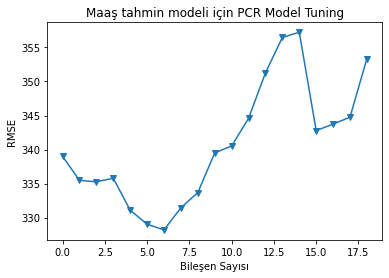

In [35]:
import matplotlib.pyplot as plt
plt.plot(rmse,"-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Maaş tahmin modeli için PCR Model Tuning");


In [36]:
lm = LinearRegression()

In [37]:
pcr_model = lm.fit(X_reduce_train[:,0:7],y_train)

In [38]:
y_pred = pcr_model.predict(X_reduce_train[:,0:7])

In [39]:
print(np.sqrt(mean_squared_error(y_train,y_pred)))

306.97762986673075


In [40]:
y_pred = pcr_model.predict(X_reduce_test[:,0:7])

In [41]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

391.9374992765452
